In [5]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from pathlib import Path

This notebook loads and filters the chosen datasets. They are : 
- Set 1 : NC (Charlotte, Greensboro, Raleigh), Austin (TX), CA (San Diego), Maryland state (MD)
- Set 2 : NC (Charlotte, Greensboro, Raleigh), CA (San Diego and San Francisco), Nashville (TN), New Orleans (Louisiana), Washington state (WA), Maryland state (MD)

The datasets are commented by an indication on whether the state is a priori sexist or not, following https://www.chicagotribune.com/nation-world/ct-america-most-sexist-places-20180821-story.html. There are also mandatory features listed, that must appear in each dataset in order to be able to fulfill our analysis. Remaining interesting features are let in the filtered datasets, for potential data description. 

## For set 1 : 
    - age, gender, race
    - reason for search + search_person and search_vehicle
    - contraband_found
    
    
North Carolina : Charlotte, Greensboro and Raleigh - very sexist

In [6]:
df_charlotte = pd.read_csv('data_P4/yg821jf8611_nc_charlotte_2020_04_01.csv.zip', compression='zip')
df_raleigh = pd.read_csv('data_P4/yg821jf8611_nc_raleigh_2020_04_01.csv.zip', compression='zip')
df_greensboro = pd.read_csv('data_P4/yg821jf8611_nc_greensboro_2020_04_01.csv.zip', compression='zip')
name = ['Charlotte','Raleigh','Greensboro']

for idx,df in enumerate([df_charlotte, df_raleigh, df_greensboro]):
    print('\n For : '+str(name[idx]))
    print(set(df.columns))
    print('Dimensions of dataframe before filtering :'+str(df.shape))
    df.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search'], inplace=True)
    print('Dimensions of dataframe after :'+str(df.shape))
    df.drop(df.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop']), 1, inplace=True)
    print(df.head())


 For : Charlotte
{'subject_sex', 'location', 'reason_for_frisk', 'contraband_found', 'contraband_weapons', 'raw_Race', 'raw_Ethnicity', 'outcome', 'raw_action_description', 'warning_issued', 'search_person', 'department_name', 'county_name', 'subject_age', 'date', 'contraband_drugs', 'type', 'officer_id_hash', 'frisk_performed', 'raw_row_number', 'citation_issued', 'time', 'reason_for_stop', 'subject_race', 'arrest_made', 'search_conducted', 'search_vehicle', 'search_basis', 'reason_for_search'}
Dimensions of dataframe before filtering :(1598453, 29)
Dimensions of dataframe after :(92878, 29)
    subject_age subject_race subject_sex  arrest_made  citation_issued  \
81         21.0        black        male         True            False   
82         21.0        black        male         True            False   
90         25.0        black        male         True            False   
91         25.0        black        male         True            False   
92         25.0        black 

<BarContainer object of 63 artists>

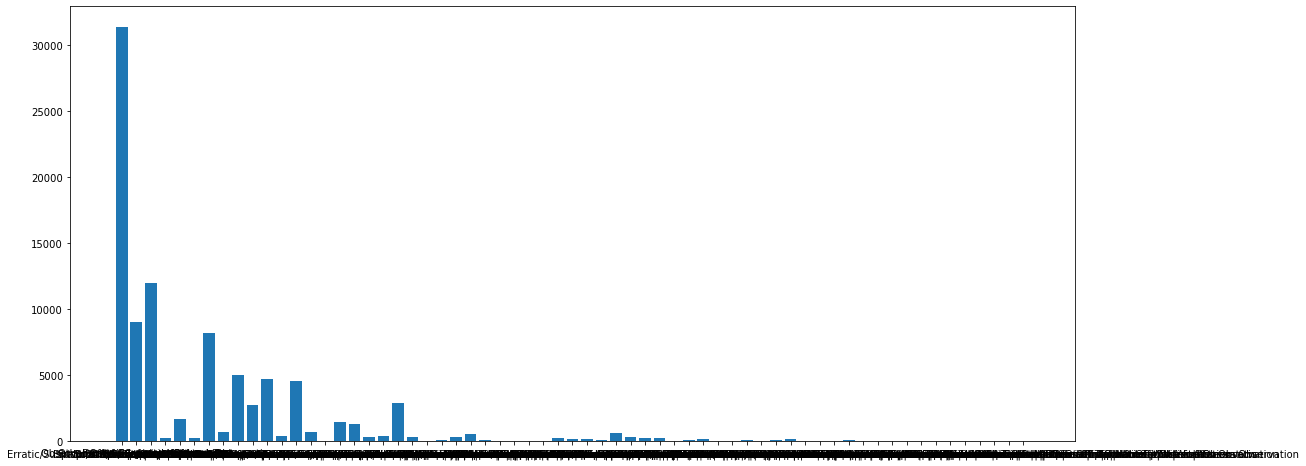

In [7]:
import collections 
from collections import Counter
import matplotlib.pyplot as plt
plt.figure(figsize=[18,8])
plt.bar(Counter(df_charlotte.dropna(subset=['reason_for_search']).reason_for_search).keys(), Counter(df_charlotte.dropna(subset=['reason_for_search']).reason_for_search).values())

San Diego (California) - not so sexist
- without frisk information

In [8]:
df_sandiego = pd.read_csv('data_P4/without_frisk_performed/yg821jf8611_ca_san_diego_2020_04_01.csv.zip', compression='zip')

print('\n For : San Diego')
print(set(df_sandiego.columns))
print('Dimensions of dataframe before filtering :'+str(df_sandiego.shape))
df_sandiego.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search'], inplace=True)
print('Dimensions of dataframe after :'+str(df_sandiego.shape))
df_sandiego.drop(df_sandiego.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop']), 1, inplace=True)
print(df_sandiego.head())


 For : San Diego
{'subject_sex', 'contraband_found', 'outcome', 'search_person', 'warning_issued', 'subject_age', 'date', 'type', 'raw_subject_race_description', 'raw_row_number', 'citation_issued', 'time', 'reason_for_stop', 'subject_race', 'arrest_made', 'raw_action_taken', 'service_area', 'search_conducted', 'search_vehicle', 'search_basis', 'reason_for_search'}
Dimensions of dataframe before filtering :(383027, 21)
Dimensions of dataframe after :(13446, 21)
     subject_age subject_race subject_sex arrest_made citation_issued  \
80          25.0     hispanic        male       False           False   
127         28.0     hispanic        male       False            True   
171         27.0     hispanic      female       False            True   
193         55.0        black        male       False           False   
221         36.0        white        male       False            True   

    warning_issued contraband_found search_person search_vehicle  \
80            True        

Austin (TX) - very sexist

In [16]:
df_austin = pd.read_csv('data_P4/yg821jf8611_tx_austin_2020_04_01.csv.zip', compression='zip')

print('\n For : San Diego')
print(set(df_austin.columns))
print('Dimensions of dataframe before filtering :'+str(df_austin.shape))
df_austin.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'raw_person_search_search_based_on'], inplace=True)
print('Dimensions of dataframe after :'+str(df_austin.shape))
df_austin.drop(df_austin.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'raw_person_search_search_based_on', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop']), 1, inplace=True)
df_austin = df_austin.rename(columns={'search_based': 'reason_for_search'})
print(df_austin.head())


 For : San Diego
{'subject_sex', 'vehicle_year', 'contraband_found', 'raw_ethnicity', 'raw_vehicle_search_search_discovered', 'contraband_weapons', 'search_person', 'vehicle_registration_state', 'raw_person_search_search_discovered', 'subject_age', 'date', 'contraband_drugs', 'type', 'officer_id_hash', 'frisk_performed', 'raw_person_search_search_based_on', 'vehicle_make', 'raw_row_number', 'reason_for_stop', 'raw_vehicle_searched', 'subject_race', 'raw_race_description', 'raw_person_searched', 'raw_vehicle_search_search_based_on', 'raw_street_check_description', 'search_conducted', 'search_vehicle', 'search_basis', 'vehicle_model'}
Dimensions of dataframe before filtering :(483255, 29)
Dimensions of dataframe after :(15039, 29)
     subject_age subject_race subject_sex contraband_found  frisk_performed  \
406         19.0        black        male             True            False   
416         27.0        black        male            False             True   
420         56.0     hi

Maryland - least sexist state

In [10]:
df_MD = pd.read_csv('data_P4/without_frisk_performed/yg821jf8611_md_statewide_2020_04_01.csv.zip', compression='zip')

print('\n For : Maryland')
print(set(df_MD.columns))
print('Dimensions of dataframe before filtering :'+str(df_MD.shape))
df_MD.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search'], inplace=True)
print('Dimensions of dataframe after :'+str(df_MD.shape))
df_MD.drop(df_MD.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop']), 1, inplace=True)
print(df_MD.head())

C:\Users\julie\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,2,3,9,10,11,12,13,14,15,16,17,19,20,21,22,23,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,



 For : Maryland
{'subject_sex', 'location', 'contraband_found', 'contraband_weapons', 'raw_Race', 'outcome', 'warning_issued', 'search_person', 'department_name', 'subject_age', 'date', 'violation', 'contraband_drugs', 'type', 'raw_Arrest_Made', 'raw_Outcome', 'raw_row_number', 'citation_issued', 'time', 'disposition', 'reason_for_stop', 'subject_race', 'reason_for_arrest', 'arrest_made', 'search_conducted', 'search_vehicle', 'search_basis', 'reason_for_search'}
Dimensions of dataframe before filtering :(3669665, 28)
Dimensions of dataframe after :(28363, 28)
         subject_age subject_race subject_sex arrest_made citation_issued  \
2312659         59.0        black        male        True           False   
2312729         43.0        white      female        True           False   
2312735         47.0        white        male       False           False   
2312736         33.0        white        male        True           False   
2312782         24.0        white      female   

## For set 2 :
    - age, gender, race
    - reason for stop + contraband found
    - citation OR warning OR arrest

San Francisco (California) - not so sexist

- without frisk information

In [18]:
df_sanfrancisco = pd.read_csv('data_P4/without_frisk_performed/yg821jf8611_ca_san_francisco_2020_04_01.csv.zip', compression='zip')

print('\n For San Francisco')
print(set(df_sanfrancisco.columns))
print('Dimensions of dataframe before filtering :'+str(df_sanfrancisco.shape))
df_sanfrancisco.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'reason_for_stop'], inplace=True)
print('Dimensions of dataframe after :'+str(df_sanfrancisco.shape))
df_sanfrancisco.drop(df_sanfrancisco.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop']), 1, inplace=True)
print(df_sanfrancisco.head())                            

C:\Users\julie\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,



 For San Francisco
{'subject_sex', 'location', 'contraband_found', 'outcome', 'warning_issued', 'subject_age', 'date', 'type', 'raw_search_vehicle_description', 'lng', 'raw_row_number', 'citation_issued', 'time', 'reason_for_stop', 'raw_result_of_contact_description', 'subject_race', 'arrest_made', 'search_conducted', 'district', 'search_vehicle', 'search_basis', 'lat'}
Dimensions of dataframe before filtering :(905070, 22)
Dimensions of dataframe after :(49599, 22)
       subject_age subject_race subject_sex  arrest_made  citation_issued  \
33182         39.0     hispanic        male         True            False   
33185         24.0     hispanic      female         True            False   
33192         24.0        white        male        False            False   
33210         27.0        white        male        False            False   
33211         48.0        black        male        False             True   

       warning_issued contraband_found  search_vehicle  \
33182  

Nashville (Tennessee) - ultra sexist

In [19]:
df_nashville = pd.read_csv('data_P4/yg821jf8611_tn_nashville_2020_04_01.csv.zip', compression='zip')

print('\n For Nashville (TN)')
print(set(df_nashville.columns))
print('Dimensions of dataframe before filtering :'+str(df_nashville.shape))
df_nashville.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'reason_for_stop'], inplace=True)
print('Dimensions of dataframe after :'+str(df_nashville.shape))
df_nashville.drop(df_nashville.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop']), 1, inplace=True)
print(df_nashville.head())

C:\Users\julie\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,



 For Nashville (TN)
{'subject_sex', 'location', 'raw_traffic_citation_issued', 'raw_written_warning_issued', 'contraband_found', 'contraband_weapons', 'outcome', 'warning_issued', 'search_person', 'precinct', 'vehicle_registration_state', 'reporting_area', 'raw_search_plain_view', 'subject_age', 'date', 'violation', 'raw_driver_searched', 'contraband_drugs', 'raw_search_consent', 'type', 'officer_id_hash', 'notes', 'frisk_performed', 'lng', 'raw_row_number', 'citation_issued', 'raw_search_inventory', 'time', 'reason_for_stop', 'zone', 'subject_race', 'arrest_made', 'search_conducted', 'raw_verbal_warning_issued', 'raw_suspect_ethnicity', 'raw_search_warrant', 'raw_passenger_searched', 'search_vehicle', 'search_basis', 'lat', 'raw_misd_state_citation_issued', 'raw_search_arrest'}
Dimensions of dataframe before filtering :(3092351, 42)
Dimensions of dataframe after :(126411, 42)
    subject_age subject_race subject_sex arrest_made citation_issued  \
4          21.0        black        m

New Orleans (Lousiana) - sexist

In [20]:
df_neworleans = pd.read_csv('data_P4/yg821jf8611_la_new_orleans_2020_04_01.csv.zip', compression='zip')

print('\n For New Orleans (Louisiana)')
print(set(df_neworleans.columns))
print('Dimensions of dataframe before filtering :'+str(df_neworleans.shape))
df_neworleans.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'reason_for_stop'], inplace=True)
print('Dimensions of dataframe after :'+str(df_neworleans.shape))
df_neworleans.drop(df_neworleans.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop']), 1, inplace=True)
print(df_neworleans.head())

C:\Users\julie\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,



 For New Orleans (Louisiana)
{'subject_sex', 'location', 'vehicle_year', 'contraband_found', 'contraband_weapons', 'outcome', 'warning_issued', 'search_person', 'officer_assignment', 'subject_age', 'date', 'contraband_drugs', 'type', 'frisk_performed', 'vehicle_make', 'lng', 'raw_row_number', 'citation_issued', 'time', 'reason_for_stop', 'vehicle_color', 'zone', 'subject_race', 'arrest_made', 'raw_subject_race', 'search_conducted', 'district', 'raw_actions_taken', 'search_vehicle', 'search_basis', 'lat', 'vehicle_model'}
Dimensions of dataframe before filtering :(512092, 32)
Dimensions of dataframe after :(75126, 32)
     subject_age subject_race subject_sex  arrest_made  citation_issued  \
380         27.0        black        male        False            False   
414         18.0        black        male         True            False   
417         24.0        black      female        False             True   
433         52.0        black        male         True             True   

Washington state - middle sexist
 - contains officer's gender 

In [21]:
# Washington state - middle
df_WA = pd.read_csv('data_P4/yg821jf8611_wa_statewide_2020_04_01.csv.zip', compression='zip')
# contains officers' gender

print(set(df_WA.columns))
print('Dimensions of dataframe :'+str(df_WA.shape))
df_WA.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_conducted'], inplace=True)
df_WA.drop(df_WA.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop', 'officer_sex' ]), 1, inplace = True)
                                     
print('Male officers :'+format(len(df_WA[df_WA['officer_sex']=='male'])))
print('Female officers :'+format(len(df_WA[df_WA['officer_sex']=='female'])))
print('Dimensions of dataframe :'+str(df_WA.shape))
df_WA.head()

C:\Users\julie\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{'subject_sex', 'location', 'contraband_found', 'officer_sex', 'raw_enforcements', 'raw_search_type', 'outcome', 'warning_issued', 'department_name', 'county_name', 'subject_age', 'date', 'raw_driver_race', 'violation', 'type', 'raw_contact_type', 'raw_officer_race', 'frisk_performed', 'officer_race', 'lng', 'raw_row_number', 'citation_issued', 'raw_officer_gender', 'time', 'subject_race', 'arrest_made', 'raw_driver_gender', 'search_conducted', 'search_basis', 'lat'}
Dimensions of dataframe :(11333425, 30)
Male officers :225840
Female officers :13757
Dimensions of dataframe :(239597, 9)


,subject_age,subject_race,subject_sex,officer_sex,arrest_made,citation_issued,warning_issued,contraband_found,frisk_performed
7,18.0,white,male,male,NaN,True,True,False,False
61,47.0,white,male,male,NaN,True,True,False,False
62,23.0,white,male,male,NaN,True,True,False,False
82,44.0,white,male,male,NaN,True,True,True,False
87,35.0,other,female,male,NaN,True,True,False,False


**Saving the filtered datasets :**

In [22]:
DF = [df_charlotte, df_raleigh, df_greensboro, df_austin, df_neworleans, df_sandiego, df_sanfrancisco, df_nashville, df_WA, df_MD]
name = ['df_charlotte', 'df_raleigh', 'df_greensboro', 'df_austin', 'df_neworleans', 'df_sandiego', 'df_sanfrancisco', 'df_nashville', 'df_WA', 'df_MD']

for idx,df in enumerate(DF):
    df.to_csv('data_P4/'+name[idx]+'.csv', sep=',', encoding='utf-8')

In [44]:
# Philadelphia : middle 
df_PA = pd.read_csv('data_P4/yg821jf8611_pa_philadelphia_2020_04_01.csv.zip', compression='zip')
print(set(df_PA.columns))
print('Dimensions of dataframe :'+str(df_PA.shape))
#others tested too, but oftentimes (very very often) not all information needed, e.g. CT, Louisville(KY), SC, Florida, etc. 

C:\Users\julie\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{'contraband_found', 'raw_individual_contraband', 'district', 'location', 'time', 'lat', 'arrest_made', 'frisk_performed', 'lng', 'search_person', 'raw_vehicle_contraband', 'search_vehicle', 'service_area', 'raw_row_number', 'outcome', 'subject_age', 'raw_race', 'subject_race', 'date', 'search_conducted', 'type', 'subject_sex'}
Dimensions of dataframe :(1865096, 22)


In [49]:
print(set(df_louisville.columns))

{'raw_division', 'officer_sex', 'raw_driver_age_range', 'raw_persons_race', 'raw_was_vehcile_searched', 'violation', 'location', 'raw_beat', 'raw_persons_ethnicity', 'time', 'raw_citation_location', 'reason_for_search', 'lat', 'beat', 'frisk_performed', 'division', 'officer_race', 'warning_issued', 'lng', 'citation_issued', 'raw_driver_race', 'raw_row_number', 'outcome', 'subject_age', 'search_basis', 'subject_race', 'date', 'search_conducted', 'raw_activity_division', 'type', 'raw_activity_beat', 'subject_sex'}


In [72]:
set(df_louisville.reason_for_search)

{'- SMALL BAGGIES OF M',
 '-----',
 'ABOVE REMOVED A HAND',
 'ACCIDENT INVESTIGATI',
 'ADD INTOX.',
 'ADDITIONAL INTOXICAN',
 'ADDITIONAL NARCOTICS',
 'ADMISSION MARIJUANA',
 'ADMISSION/PERMISSIVE',
 'ADMITANCE',
 'ADMITTED THERE MAY B',
 'ADMITTED TO HAVING N',
 'ARREST',
 'ARREST (-ST DIVISION',
 'ARREST DRUGS',
 'ARREST FOR WARRANTS',
 'ARREST, ADMISSION OF',
 'ARREST, PERMISSION G',
 'ARREST.',
 'ARREST/PC',
 'ARREST; PROBABLE CAU',
 'BY OFFICER BYERLY IN',
 'CHECKED SUB`S BACKPA',
 'COMPLAINT OF NARCOTI',
 'CONSENT',
 'CONSENT -SMELL',
 'CONSENT = MARI',
 'CONSENT AND IN PLAIN',
 'CONSENT AND PC',
 'CONSENT AND PC FOR O',
 'CONSENT AND SIA',
 'CONSENT AND UNDER AR',
 'CONSENT FOR VEHICLE',
 'CONSENT FROM OWNER',
 'CONSENT GIVEN BY OWN',
 'CONSENT METH',
 'CONSENT METH & STOLE',
 'CONSENT POM',
 'CONSENT SEARCH',
 'CONSENT SEARCH AND S',
 'CONSENT SEARCH OF VE',
 'CONSENT SEARCH, SEAR',
 'CONSENT SEARCH, SUBJ',
 'CONSENT SUBOXONE',
 'CONSENT TO PC -HEROI',
 'CONSENT TO SEARCH',
 'C